#  Cifar10 Dataset on NN

# data
# model
# loss Function
# optimizer


In [1]:
import torch
import torch.nn as nn


In [2]:
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.optim as optim


In [21]:
import torch.nn.functional as F

# Data

In [3]:
train_ds=datasets.CIFAR10(root='/root',train=True,transform=transforms.ToTensor(),download=True)
test_ds=datasets.CIFAR10(root='/root',train=False,transform=transforms.ToTensor(),download=True)


Files already downloaded and verified
Files already downloaded and verified


In [4]:
train_ds.data.shape

(50000, 32, 32, 3)

In [5]:
test_ds.data.shape

(10000, 32, 32, 3)

In [16]:
batch_size=18

In [34]:
train_dl=DataLoader(dataset=train_ds,batch_size=batch_size,shuffle=True,num_workers=2)
test_dl=DataLoader(dataset=test_ds,batch_size=batch_size,shuffle=True,num_workers=2)


In [18]:
image,target=next(iter(train_dl))

In [19]:
image.shape

torch.Size([18, 3, 32, 32])

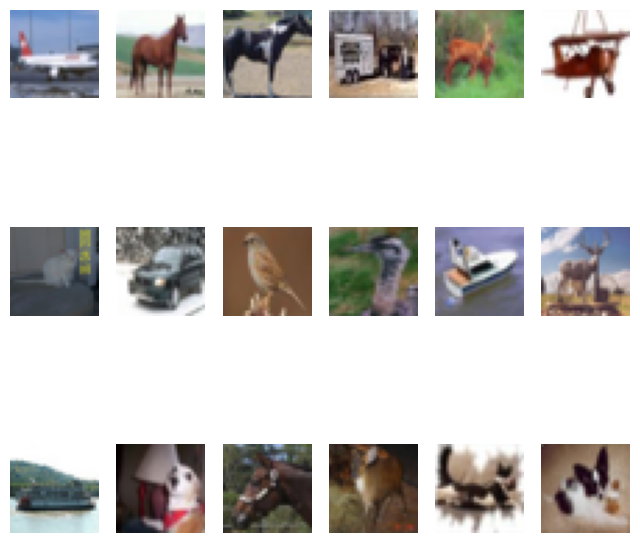

In [20]:
plt.figure(figsize=(8,8))
for i in range(18):
    plt.subplot(3,6,i+1)
    img=torch.transpose(image[i],0,1)
    img=torch.transpose(img,1,2)
    plt.imshow(img)
    plt.axis('off')
plt.show()    

 # model

In [49]:
class NN(nn.Module):
    def __init__(self,input_size,num_class):
        super(NN,self).__init__()
        self.fc1=nn.Linear(in_features=input_size,out_features= 500)
        self.fc2=nn.Linear(in_features=500,out_features=100)
        self.fc3=nn.Linear(in_features=100,out_features=num_class)
        
    def forward(self,x):
        out=self.fc1(x)
        out=F.relu(out)
        out=self.fc2(out)
        out=F.relu(out)
        out=self.fc3(out)
        return out
        

In [50]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [51]:
model=NN(input_size=32*32*3,num_class=10).to(device)

In [52]:
model

NN(
  (fc1): Linear(in_features=3072, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)

# loss

In [53]:
citertion=nn.CrossEntropyLoss()


# optimizer


In [54]:
optimizer=optim.SGD(params=model.parameters(),lr=0.01)

# train 

In [55]:
epoch=10

In [56]:
for i in range(epoch):
    sum_loss=0
    for idx,(image,target) in enumerate(train_dl):
        image=image.to(device)
        target=target.to(device)
        image=image.reshape(image.shape[0],-1)
        
        optimizer.zero_grad()
        
        score=model(image)
        
        loss=citertion(score,target)
        sum_loss+=loss
        
        loss.backward()
        
        optimizer.step()
        
    print(f"loss in epoch number {i} is equal to {sum_loss}")
    
        
        

loss in epoch number 0 is equal to 5430.23388671875
loss in epoch number 1 is equal to 4823.5458984375
loss in epoch number 2 is equal to 4554.77197265625
loss in epoch number 3 is equal to 4372.25244140625
loss in epoch number 4 is equal to 4225.82861328125
loss in epoch number 5 is equal to 4105.26171875
loss in epoch number 6 is equal to 4008.21484375
loss in epoch number 7 is equal to 3923.57568359375
loss in epoch number 8 is equal to 3832.229736328125
loss in epoch number 9 is equal to 3766.309814453125


In [35]:
def check_accuracy(dataloader,model):
    
    if dataloader.dataset.train:
        print('accuracy on train data')
    else:
        print('accuracy on test data')
        
    correct_sample=0
    sum_sample=0
    
    model.eval()
    
    with torch.no_grad():
        for x,y in dataloader:
            x=x.to(device)
            y=y.to(device)
            
            x=x.reshape(x.shape[0],-1)
            
            score=model(x)
            
            _,pred=score.max(1)
            
            correct_sample+=(pred==y).sum()
            sum_sample+=len(y)
            
    print(f'accuracy is equal to {correct_sample/sum_sample }')   
    model.train()
            

In [57]:
check_accuracy(test_dl,model)

accuracy on test data
accuracy is equal to 0.48819997906684875


In [58]:
check_accuracy(train_dl,model)

accuracy on train data
accuracy is equal to 0.521619975566864
